In [67]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite, NormalPdf

import thinkplot

from ipywidgets import interact

# Heights

1) For adult male residents of the US, the mean and standard deviation of height are 178 cm and 7.7 cm.  For adult female residents the corresponding stats are 163 cm and 7.3 cm.  Suppose you learn that someone is 170 cm tall.  What is the probability that they are male?  

Note: We will have to discuss how to handle the likelihood function in this case, which is the PDF of the Gaussian distribution.

2) Run this analysis again for a range of observed heights from 150 cm to 200 cm, and plot a curve that shows P(male) versus height.  What is the mathematical form of this function?

In [21]:
pop_stats = {
    'm': NormalPdf(178, 7.7),
    'f': NormalPdf(163, 7.3)
}

{'m': <thinkbayes2.thinkbayes2.NormalPdf at 0x7fa847a79198>,
 'f': <thinkbayes2.thinkbayes2.NormalPdf at 0x7fa847a79358>}

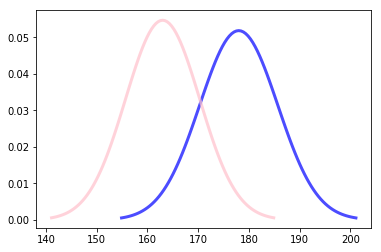

In [62]:
thinkplot.Pdf(pop_stats['m'], color='blue')
thinkplot.Pdf(pop_stats['f'], color='pink')

In [66]:
class HeightProblem(Suite):
    def __init__(self):
        super().__init__('m f'.split())
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: 'm' or 'f'
        hypo: height (cm)
        """
        dist = pop_stats[hypo]
        
        return dist.Density(data)

No handles with labels found to put in legend.


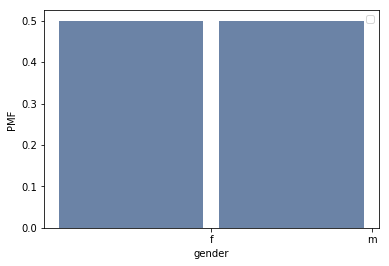

In [64]:
prior = HeightProblem()
thinkplot.Hist(prior)
thinkplot.Config(xlabel='gender', ylabel='PMF')

No handles with labels found to put in legend.


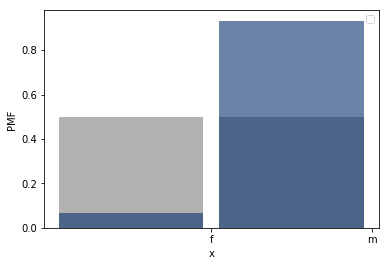

In [65]:
def plot(height = 170):
    posterior = prior.Copy()
    posterior.Update(height)
    thinkplot.Hist(prior, color='gray')
    thinkplot.Hist(posterior)
    thinkplot.Config(xlabel='x', ylabel='PMF')

plot(180)

In [68]:
interact(plot)

interactive(children=(IntSlider(value=170, description='height', max=510, min=-170), Output()), _dom_classes=(…

<function __main__.plot(height=170)>

In [69]:
'H'*7+'T'*3

'HHHHHHHTTT'

# Reddit

This exercise is inspired by a question posted by a “redditor” named dominosci on Reddit’s statistics “subreddit” at http://reddit.com/r/statistics.

Reddit is an online forum with many interest groups called subreddits. Users, called redditors, post links to online content and other web pages. Other redditors vote on the links, giving an “upvote” to high-quality links and a “downvote” to links that are bad or irrelevant.

A problem, identified by dominosci, is that some redditors are more reliable than others, and Reddit does not take this into account.

The challenge is to devise a system so that when a redditor casts a vote, the estimated quality of the link is updated in accordance with the reliability of the redditor, and the estimated reliability of the redditor is updated in accordance with the quality of the link.

One approach is to model the quality of the link as the probability of garnering an upvote, and to model the reliability of the redditor as the probability of correctly giving an upvote to a high-quality item.

Write class definitions for redditors and links and an update function that updates both objects whenever a redditor casts a vote.

In [70]:
class Redditor(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: the Link that was liked
        hypo: Redditor reliability (0...1)
        """
        dist = pop_stats[hypo]
        
        return dist.Density(data)
    
class Link(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: the Redditor that liked it
        hypo: link value (0...1)
        """
        dist = pop_stats[hypo]
        
        return dist.Density(data)